### Importing the Libraries

In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

### Loading the train data

In [101]:
train = pd.read_csv('TRAIN.csv')
train.head()

C:\Users\tiwar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag,Type_of_Default
0,1,54549,M,300000.0,12th pass,SALARIED,M,Yes,Red,A,300000,<50L,10.0,1.0,M!,X1,3600,13/04/2004,No,NaN
1,2,109641,M,1475000.0,Graduatee,SALARIED,M,Yes,Red,A,10000000,>=50,30.0,26.0,M2,X2,11866,28/11/2003,No,NaN
2,3,110227,M,500000.0,Graduate,SALARIED,S,Yes,Green,A,10000000,>=50,26.0,22.0,M2,X3,7565,04/01/2004,No,NaN
3,4,104886,M,400000.0,Graduate,SALARIED,M,Yes,Amber,A,2500000,<50L,25.0,21.0,M2,X3,4993,08/09/2004,No,NaN
4,6,90854,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,25.0,21.0,M2,X1,18914,06/05/2003,No,NaN


In [102]:
#train = pd.DataFrame(data=train)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397303 entries, 0 to 397302
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397303 non-null  int64  
 1   Client_ID                         397303 non-null  int64  
 2   Loanee_Gender                     397301 non-null  object 
 3   Loanee_Annual_Income              397303 non-null  float64
 4   Loanee_Education                  397303 non-null  object 
 5   Loanee_Occupation                 395307 non-null  object 
 6   Loanee_Marital_Status             397303 non-null  object 
 7   Credit_Criteria                   397303 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  397303 non-null  object 
 9   Loan_Type                         397303 non-null  object 
 10  Loan_Amount                       397303 non-null  int64  
 11  Loan_Amount_Category              397303 non-null  o

In [104]:
train.shape

(397303, 20)

### Summary statistics of numerical columns of train data

In [105]:
train.describe()

,Loan_ID,Client_ID,Loanee_Annual_Income,Loan_Amount,Credit_line,Past_year_overdue,EMI_Amount
count,397303.000000,397303.000000,3.973030e+05,3.973030e+05,397181.000000,397181.000000,3.973030e+05
mean,270273.350375,242749.346813,-1.371183e+06,5.965406e+06,26.601486,22.454727,1.096141e+04
std,239857.150729,127297.242938,1.586849e+09,6.851910e+06,11.402733,11.484180,1.380287e+04
min,1.000000,100.000000,-1.000000e+12,3.500000e+04,5.000000,1.000000,1.159000e+03
25%,100720.500000,142897.000000,3.200000e+05,2.500000e+06,20.000000,16.000000,5.040000e+03
50%,201356.000000,246670.000000,5.000000e+05,5.000000e+06,30.000000,26.000000,8.160000e+03
75%,301902.500000,350158.500000,1.000000e+06,8.000000e+06,35.000000,31.000000,1.307600e+04
max,780594.000000,764088.000000,9.410675e+09,5.000000e+08,57.000000,53.000000,2.773698e+06


## Missing Value imputaion

In [106]:
### Checking for null values
print(train.isnull().sum())

Loan_ID                                  0
Client_ID                                0
Loanee_Gender                            2
Loanee_Annual_Income                     0
Loanee_Education                         0
Loanee_Occupation                     1996
Loanee_Marital_Status                    0
Credit_Criteria                          0
Loanee_Third_Party_Credit_Rating         0
Loan_Type                                0
Loan_Amount                              0
Loan_Amount_Category                     0
Credit_line                            122
Past_year_overdue                      122
EMI_Payment_Mode                         0
Bank_Division                            0
EMI_Amount                               0
Loan_Application_Date                    0
Default_Flag                             0
Type_of_Default                     396590
dtype: int64


### Ratio of the missing values in train dataset

In [107]:
miss = train.isnull().sum() / len(train) * 100
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Loanee_Gender         0.000503
Credit_line           0.030707
Past_year_overdue     0.030707
Loanee_Occupation     0.502387
Type_of_Default      99.820540
dtype: float64

##### Here we can see that "Type_of_Default" column has more than 99% missing values, it implies that it won't 
give any great insights in further analysis and there is no point in imputing so many missing values, 
so this column will the dropped from the dataset for further analysis

### Null value imputation in train dataset

In [108]:
##For Gender Column
train['Loanee_Gender']=train['Loanee_Gender'].fillna(train['Loanee_Gender'].mode()[0])

In [109]:

train['Loanee_Education'].unique()

array(['12th pass', 'Graduatee', 'Graduate', 'Post Grad or Higher',
       'Diploma', '10th pass', 'GRADUATE', 'less than 10th pass', 'Other'],
      dtype=object)

In [110]:
train['Loanee_Education'].replace({'GRADUATE':'Graduate'},inplace=True)
train['Loanee_Education'].replace({'Graduatee':'Graduate'},inplace=True)

In [111]:
train['Loanee_Occupation'].unique()

array(['SALARIED', 'DOCTOR', 'STUDENT', 'RETIRED', 'PUBLIC SERVICE',
       'BUSINESS', 'Others', 'SELF EMPLOYED', nan, 'AGRICULTURE',
       'HOUSEWIFE'], dtype=object)

In [112]:
train['Loanee_Occupation'].replace({np.nan:'Others'},inplace=True)

In [113]:
train['Loanee_Education'].unique()

array(['12th pass', 'Graduate', 'Post Grad or Higher', 'Diploma',
       '10th pass', 'less than 10th pass', 'Other'], dtype=object)

In [114]:
train.dropna(subset = ['Credit_line'], inplace = True)

In [115]:
train['Past_year_overdue'].isnull().sum()

0

In [116]:
train['Credit_line'].isnull().sum()

0

In [117]:
train['EMI_Payment_Mode'].replace({'M!':'M1'},inplace=True)

## Outlier Detection

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loanee_Annual_Income'>

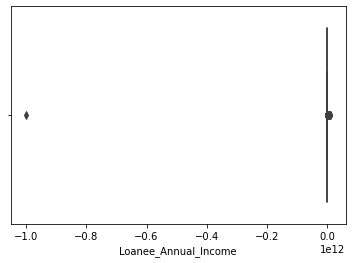

In [118]:
sns.boxplot(train['Loanee_Annual_Income'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMI_Amount'>

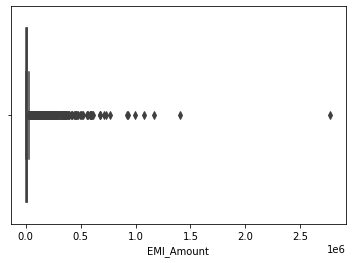

In [119]:
sns.boxplot(train['EMI_Amount'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount'>

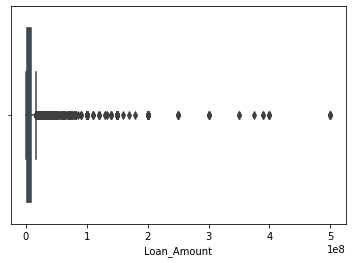

In [120]:
sns.boxplot(train['Loan_Amount'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_line'>

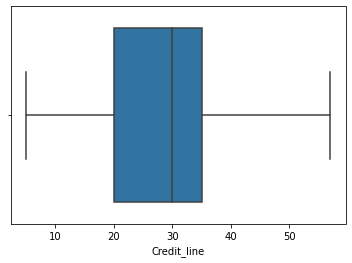

In [121]:
sns.boxplot(train['Credit_line'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Past_year_overdue'>

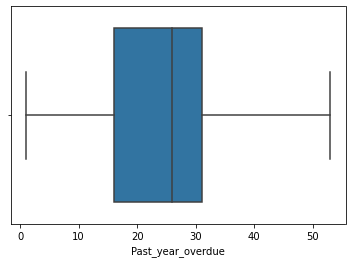

In [122]:
sns.boxplot(train['Past_year_overdue'])

In [123]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
#Remove outliers for Annual Income
lower_1, upper_1 = remove_outlier(train.Loanee_Annual_Income)
train = train.loc[(train.Loanee_Annual_Income > lower_1) & (train.Loanee_Annual_Income < upper_1)] 
#Remove outliers for EMI_Amount
lower_2, upper_2 = remove_outlier(train.EMI_Amount)
train = train.loc[(train.EMI_Amount > lower_2) & (train.EMI_Amount < upper_2)]
#Remove outliers for Loan_Amount
lower_2, upper_2 = remove_outlier(train.Loan_Amount)
train = train.loc[(train.Loan_Amount > lower_2) & (train.Loan_Amount < upper_2)]

In [124]:
train['Loan_Amount_Category'].value_counts(normalize = True)

<50L    0.502229
>=50    0.497771
Name: Loan_Amount_Category, dtype: float64

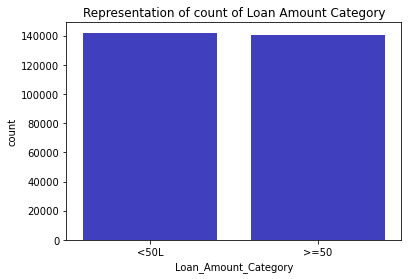

In [125]:
sns.countplot(x='Loan_Amount_Category',data=train, color='blue', saturation=0.5)
plt.title('Representation of count of Loan Amount Category')
plt.show()

In [126]:
##The number of Loanees with loan amount greater the 50L is more than the number of Loanees with Loan amount less than 50L

In [127]:
##Removing unwanted columns from the dataset for analysis
train = train.drop(['Type_of_Default','Loan_ID', 'Client_ID','Loan_Application_Date'],axis=1)

In [128]:
train

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Default_Flag
0,M,300000.0,12th pass,SALARIED,M,Yes,Red,A,300000,<50L,10.0,1.0,M1,X1,3600,No
3,M,400000.0,Graduate,SALARIED,M,Yes,Amber,A,2500000,<50L,25.0,21.0,M2,X3,4993,No
4,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,25.0,21.0,M2,X1,18914,No
6,M,72000.0,Graduate,SALARIED,S,Yes,Amber,A,2500000,<50L,30.0,26.0,M1,X4,3660,No
7,M,180000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,2000000,<50L,25.0,21.0,M2,X1,4606,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397297,M,280000.0,12th pass,AGRICULTURE,M,Yes,Green,B,250000,<50L,5.0,1.0,M2,X4,3341,No
397298,M,250000.0,less than 10th pass,AGRICULTURE,M,Yes,Red,B,200000,<50L,5.0,1.0,M2,X4,2812,No
397299,M,200000.0,less than 10th pass,AGRICULTURE,M,Yes,Green,B,300000,<50L,5.0,1.0,M2,X4,4672,No
397300,M,800000.0,Graduate,AGRICULTURE,M,Yes,Red,B,1500000,<50L,5.0,1.0,M2,X4,9029,Yes


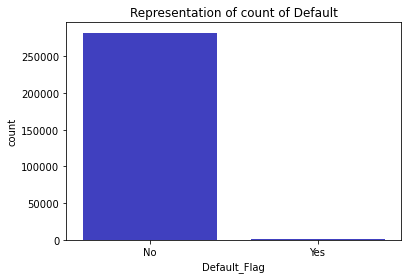

In [129]:
sns.countplot(x='Default_Flag',data=train, color='blue', saturation=0.5)
plt.title('Representation of count of Default')
plt.show()

In [130]:
crosstable=pd.crosstab(train['Default_Flag'],train['Loan_Amount_Category'])
crosstable

Loan_Amount_Category,<50L,>=50
Default_Flag,,
No,141506,140566
Yes,467,147


(<Figure size 432x288 with 3 Axes>,
 {('<50L', 'No'): (0.0, 0.0, 0.4997299712991329, 0.9933993111272643),
  ('<50L', 'Yes'): (0.0,
   0.996721570263477,
   0.4997299712991329,
   0.0032784297365230247),
  ('>=50', 'No'): (0.5047050956772423,
   0.0,
   0.49529490432275775,
   0.9956365319640624),
  ('>=50', 'Yes'): (0.5047050956772423,
   0.9989587911002752,
   0.49529490432275775,
   0.0010412088997248357)})

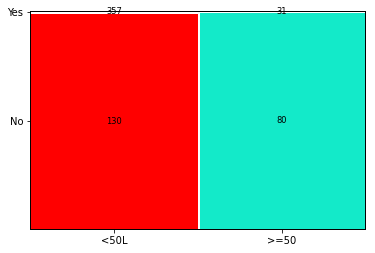

In [131]:
props={}
props[('<50L','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('<50L','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('>=50','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('>=50','No')]=        {'facecolor':'xkcd:aqua','edgecolor':'white'}
labelizer=lambda k:{('<50L','Yes'):357,('>=50','Yes'):31,('<50L','No'):130,('>=50','No'):80}[k]
mosaic(train,['Loan_Amount_Category','Default_Flag'], labelizer=labelizer ,properties=props)

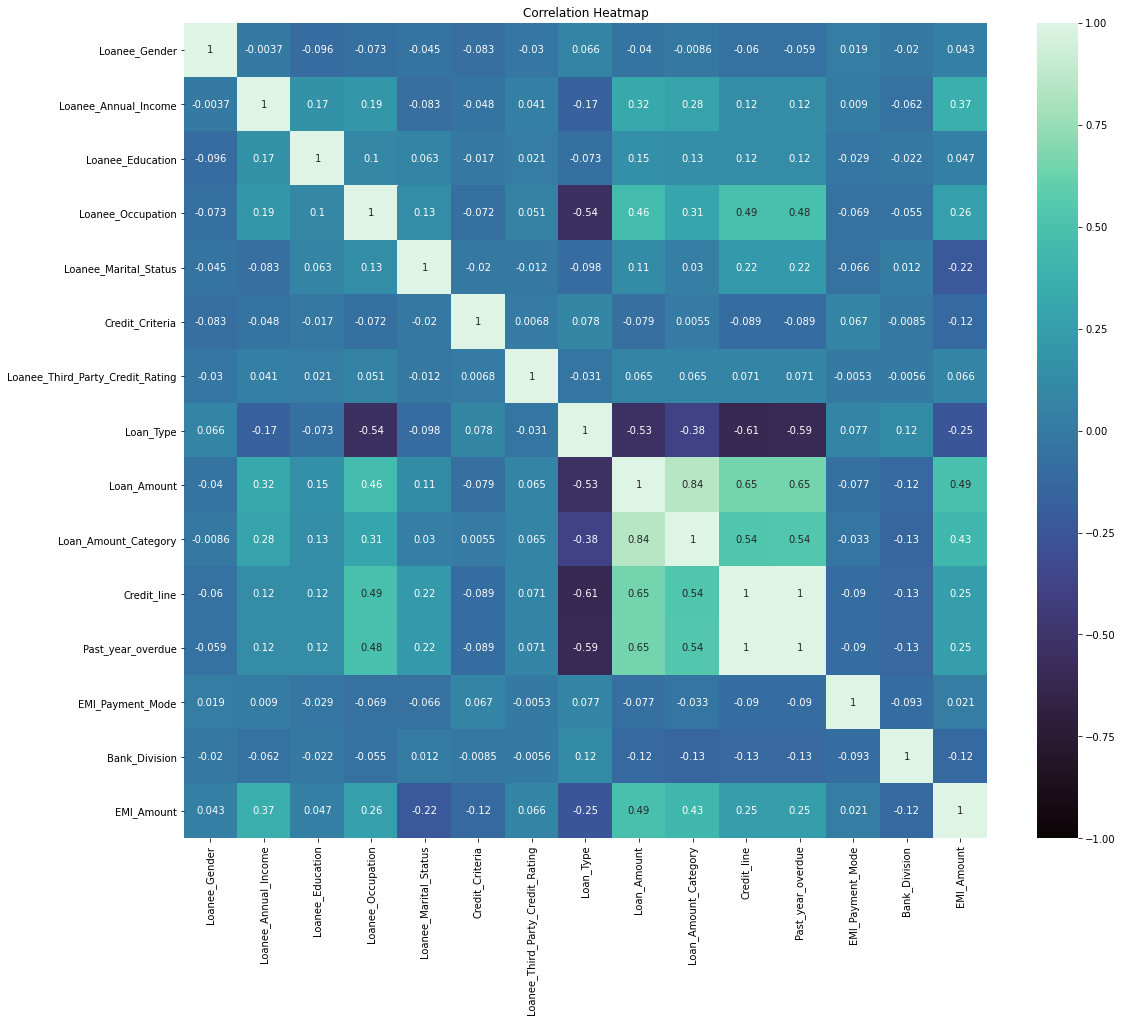

In [132]:
corr = X.corr()
plt.figure(figsize = (18,15))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show()

## Label Encoding

In [137]:
enc = LabelEncoder()
train.loc[:,['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation','Loanee_Marital_Status', 'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category', 'EMI_Payment_Mode', 'Bank_Division']] = \
train.loc[:,['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation','Loanee_Marital_Status', 'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category', 'EMI_Payment_Mode', 'Bank_Division']].apply(enc.fit_transform)
train.head()

,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Default_Flag
0,1,300000.0,1,7,1,1,2,0,300000,0,10.0,1.0,0,0,3600,No
3,1,400000.0,3,7,1,1,0,0,2500000,0,25.0,21.0,1,3,4993,No
4,1,1500000.0,5,7,1,1,2,0,5000000,1,25.0,21.0,1,0,18914,No
6,1,72000.0,3,7,2,1,0,0,2500000,0,30.0,26.0,0,4,3660,No
7,1,180000.0,5,7,2,1,1,0,2000000,0,25.0,21.0,1,0,4606,No


## Dividing the Dataset into 2 parts for training and Validation purpose and select the best model

In [138]:
X = train.drop(['Default_Flag'], axis = 1)

In [139]:
Y = train.iloc[:,[-1]]

In [140]:
X_train, X_val, Y_train, Y_val = \
train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
linear_model = LogisticRegression()
linear_model.fit(X_train, Y_train)

C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [143]:
##Predictions
predictions = linear_model.predict(X_val)

In [144]:
df = pd.DataFrame(predictions)

In [145]:
df.value_counts(normalize=True)

No    1.0
dtype: float64

## Oversampling the dataset using Smote

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
smote = SMOTE()

In [148]:
X_train_smote,Y_train_smote = smote.fit_sample(X_train, Y_train)

In [149]:
linear_model = LogisticRegression()
linear_model.fit(X_train_smote, Y_train_smote)
predict_smote = linear_model.predict(X_val)
df_smote = pd.DataFrame(predict_smote)

C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
df_smote.value_counts(normalize=True)

No     0.664281
Yes    0.335719
dtype: float64

In [151]:
acc = score(Y_val,predict_smote)
print("The accuracy of gini model is:", acc)

The accuracy of gini model is: 0.6650944508643256


In [152]:
matrix = confusion_matrix(Y_val, predict_smote)
print(matrix)

[[56283 28350]
 [   52   121]]


In [153]:
report = classification_report(Y_val, predict_smote)
print(report)

              precision    recall  f1-score   support

          No       1.00      0.67      0.80     84633
         Yes       0.00      0.70      0.01       173

    accuracy                           0.67     84806
   macro avg       0.50      0.68      0.40     84806
weighted avg       1.00      0.67      0.80     84806



In [154]:
metrics = pd.DataFrame(index = ['accuracy', 'precision', 'recall'], columns = ['LogisticReg', 'DecsiontreeG', 'DecisionTreeE', 'RF', 'XGB'])

In [155]:
metrics.loc['precision','Logistic_Reg'] = precision_score(y_pred = predict_smote, y_true = Y_val, pos_label='No')
metrics.loc['accuracy','Logistic_Reg'] = accuracy_score(y_pred = predict_smote, y_true = Y_val)
metrics.loc['recall','Logistic_Reg'] = recall_score(y_pred = predict_smote, y_true = Y_val, pos_label='No')

## Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [157]:
model = tree.DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train, Y_train)

pred = model.predict(X_val)
acc = score(Y_val,pred)
print("The accuracy of gini model is:", acc)

matrix = confusion_matrix(Y_val, pred)
print(matrix)

report = classification_report(Y_val, pred)
print(report)

The accuracy of gini model is: 0.9955427682003631
[[84426   207]
 [  171     2]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     84633
         Yes       0.01      0.01      0.01       173

    accuracy                           1.00     84806
   macro avg       0.50      0.50      0.50     84806
weighted avg       1.00      1.00      1.00     84806



In [158]:
metrics.loc['precision','DecsiontreeG'] = precision_score(y_pred = pred, y_true = Y_val, pos_label='No')
metrics.loc['accuracy','DecsiontreeG'] = accuracy_score(y_pred = pred, y_true = Y_val)
metrics.loc['recall','DecsiontreeG'] = recall_score(y_pred = pred, y_true = Y_val, pos_label='No')

In [159]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, Y_train)

pred1 = model.predict(X_val)
acc = score(Y_val,pred)
print("The accuracy of gini model is:", acc)

matrix = confusion_matrix(Y_val, pred)
print(matrix)

report = classification_report(Y_val, pred)
print(report)

The accuracy of gini model is: 0.9955427682003631
[[84426   207]
 [  171     2]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     84633
         Yes       0.01      0.01      0.01       173

    accuracy                           1.00     84806
   macro avg       0.50      0.50      0.50     84806
weighted avg       1.00      1.00      1.00     84806



In [160]:
metrics.loc['precision','DecsiontreeE'] = precision_score(y_pred = pred1, y_true = Y_val, pos_label='No')
metrics.loc['accuracy','DecsiontreeE'] = accuracy_score(y_pred = pred1, y_true = Y_val)
metrics.loc['recall','DecsiontreeE'] = recall_score(y_pred = pred1, y_true = Y_val, pos_label='No')

In [161]:
##Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_smote, Y_train_smote)
predict_smote_rf = clf_rf.predict(X_val)
df_smote_rf = pd.DataFrame(predict_smote_rf)
df_smote_rf.value_counts(normalize=True)

<ipython-input-162-cc91752bceff>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train_smote, Y_train_smote)


No     0.997052
Yes    0.002948
dtype: float64

In [163]:
acc = score(Y_val,predict_smote_rf)
print("The accuracy of Random Forest model is:", acc)
matrix = confusion_matrix(Y_val, predict_smote_rf)
print(matrix)
report = classification_report(Y_val, predict_smote_rf)
print(report)

The accuracy of Random Forest model is: 0.9950828950781784
[[84386   247]
 [  170     3]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     84633
         Yes       0.01      0.02      0.01       173

    accuracy                           1.00     84806
   macro avg       0.50      0.51      0.51     84806
weighted avg       1.00      1.00      1.00     84806



In [164]:
metrics.loc['precision','RF'] = precision_score(y_pred = predict_smote_rf, y_true = Y_val, pos_label='No')
metrics.loc['accuracy','RF'] = accuracy_score(y_pred = predict_smote_rf, y_true = Y_val)
metrics.loc['recall','RF'] = recall_score(y_pred = predict_smote_rf, y_true = Y_val, pos_label='No')

In [165]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_smote, Y_train_smote)

C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [166]:
predict_xgb = clf_xgb.predict(X_val)
df_smote_xgb = pd.DataFrame(predict_xgb)
df_smote_xgb.value_counts(normalize=True)

No     0.855812
Yes    0.144188
dtype: float64

In [167]:
acc = score(Y_val,predict_xgb)
print("The accuracy of Random Forest model is:", acc)
matrix = confusion_matrix(Y_val, predict_xgb)
print(matrix)
report = classification_report(Y_val, predict_xgb)
print(report)

The accuracy of Random Forest model is: 0.8551635497488386
[[72464 12169]
 [  114    59]]
              precision    recall  f1-score   support

          No       1.00      0.86      0.92     84633
         Yes       0.00      0.34      0.01       173

    accuracy                           0.86     84806
   macro avg       0.50      0.60      0.47     84806
weighted avg       1.00      0.86      0.92     84806



In [168]:
metrics.loc['precision','XGB'] = precision_score(y_pred = predict_xgb, y_true = Y_val, pos_label='No')
metrics.loc['accuracy','XGB'] = accuracy_score(y_pred = predict_xgb, y_true = Y_val)
metrics.loc['recall','XGB'] = recall_score(y_pred = predict_xgb, y_true = Y_val, pos_label='No')

In [169]:
100*metrics

,LogisticReg,DecsiontreeG,DecisionTreeE,RF,XGB,Logistic_Reg,DecsiontreeE
accuracy,NaN,99.554277,NaN,99.50829,85.516355,66.509445,99.584935
precision,NaN,99.797865,NaN,99.79895,99.842928,99.907695,99.800281
recall,NaN,99.755415,NaN,99.708152,85.621448,66.502428,99.783772


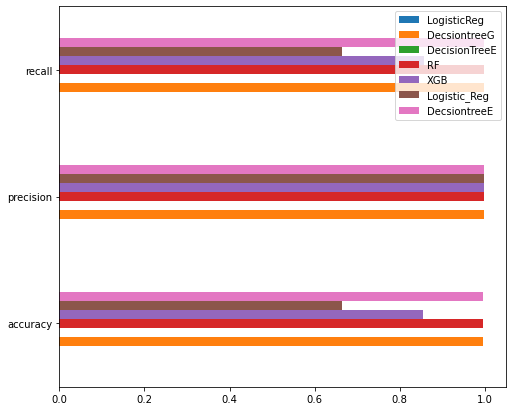

In [170]:
fig, ax = plt.subplots(figsize = (8,7))
metrics.plot(kind = 'barh', ax= ax)
ax.grid;

# Test Dateset

In [224]:
test1 = pd.read_csv('test.csv')
test1.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,06/08/2005
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,27/06/2005
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,21/06/2006
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,24/07/2005
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,11/09/2005


In [225]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398564 entries, 0 to 398563
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           398564 non-null  int64  
 1   Client_ID                         398564 non-null  int64  
 2   Loanee_Gender                     398561 non-null  object 
 3   Loanee_Annual_Income              398564 non-null  float64
 4   Loanee_Education                  398564 non-null  object 
 5   Loanee_Occupation                 364584 non-null  object 
 6   Loanee_Marital_Status             398564 non-null  object 
 7   Credit_Criteria                   398564 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  398564 non-null  object 
 9   Loan_Type                         398564 non-null  object 
 10  Loan_Amount                       398564 non-null  int64  
 11  Loan_Amount_Category              398564 non-null  o

In [226]:
test1.shape

(398564, 18)

In [227]:
test1.isnull().sum()

Loan_ID                                 0
Client_ID                               0
Loanee_Gender                           3
Loanee_Annual_Income                    0
Loanee_Education                        0
Loanee_Occupation                   33980
Loanee_Marital_Status                   0
Credit_Criteria                         0
Loanee_Third_Party_Credit_Rating        0
Loan_Type                               0
Loan_Amount                             0
Loan_Amount_Category                    0
Credit_line                             0
Past_year_overdue                       0
EMI_Payment_Mode                        0
Bank_Division                           0
EMI_Amount                              0
Loan_Application_Date                   0
dtype: int64

In [228]:
test1.shape

(398564, 18)

In [229]:
test1['Loanee_Occupation'].replace({np.nan:'Others'},inplace=True)

In [230]:
test1.shape

(398564, 18)

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loanee_Annual_Income'>

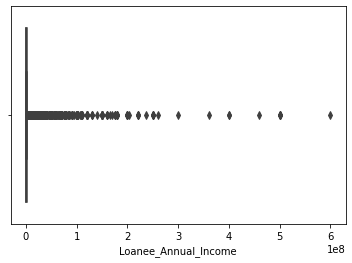

In [231]:
sns.boxplot(test1['Loanee_Annual_Income'])

In [232]:
test1.shape

(398564, 18)

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMI_Amount'>

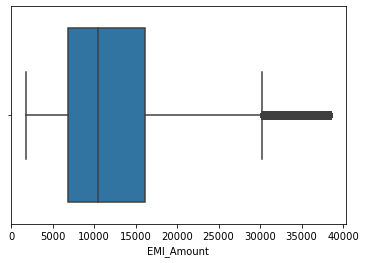

In [233]:
sns.boxplot(test['EMI_Amount'])

In [234]:
test1.shape

(398564, 18)

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount'>

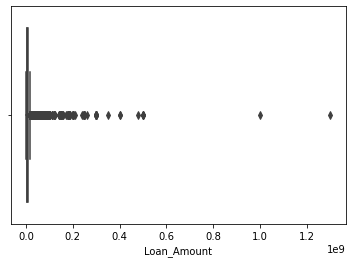

In [235]:
sns.boxplot(test1['Loan_Amount'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_line'>

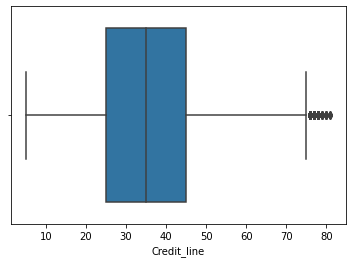

In [236]:
sns.boxplot(test1['Credit_line'])

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Past_year_overdue'>

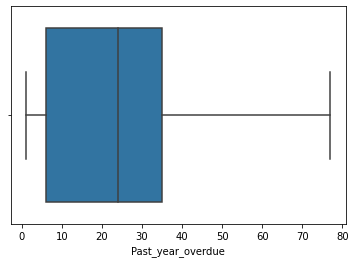

In [237]:
sns.boxplot(test1['Past_year_overdue'])

In [238]:
test1.shape

(398564, 18)

In [240]:
test1.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,06/08/2005
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,27/06/2005
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,21/06/2006
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,24/07/2005
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,11/09/2005


In [241]:
test1.shape

(398564, 18)

In [242]:
enc = LabelEncoder()
test1.loc[:,['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation','Loanee_Marital_Status', 'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category', 'EMI_Payment_Mode', 'Bank_Division']] = \
test1.loc[:,['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation','Loanee_Marital_Status', 'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category', 'EMI_Payment_Mode', 'Bank_Division']].apply(enc.fit_transform)
test1.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date
0,329120,110551,1,400000.0,3,8,1,1,1,0,1500000,0,10,6,1,3,14874,06/08/2005
1,329121,19105,1,600000.0,3,8,2,0,1,0,1500000,0,29,25,0,2,15816,27/06/2005
2,329122,90521,1,414000.0,6,8,2,1,1,0,5000000,1,27,23,2,2,7710,21/06/2006
3,329123,25177,1,1500000.0,6,8,1,1,2,0,10000000,1,28,24,1,4,13259,24/07/2005
4,329124,127806,1,600000.0,6,8,1,1,2,0,5000000,1,20,16,1,2,9170,11/09/2005


In [243]:
test1 = test1.drop(['Loan_ID', 'Client_ID','Loan_Application_Date'],axis=1)

In [244]:
test1.shape

(398564, 15)

In [245]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_smote, Y_train_smote)

C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [246]:
predict_xgb_final = clf_xgb.predict(test1)
df_smote_xgb = pd.DataFrame(predict_xgb_final)
df_smote_xgb.value_counts(normalize=True)

No     0.862361
Yes    0.137639
dtype: float64

In [247]:
df_smote_xgb

,0
0,Yes
1,No
2,No
3,No
4,No
...,...
398559,Yes
398560,Yes
398561,No
398562,Yes


In [248]:
df_smote_xgb.to_csv("results.csv")

In [250]:
df_smote_xgb.to_csv('D:/python programs/datasets/results1.csv')